# MATPLOTLIB

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [ ]:
# view all columns and rows
#pd.set_option( 'display.max_columns', None )
#pd.set_option( 'display.max_rows', None )


In [18]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'

# get dataframes
confirmed = pd.read_csv( f'{url}/time_series_covid19_confirmed_global.csv' )
deaths = pd.read_csv( f'{url}/time_series_covid19_deaths_global.csv' )
recovered = pd.read_csv( f'{url}/time_series_covid19_recovered_global.csv' )

In [19]:
dfs = [confirmed, deaths, recovered]

for df in dfs:
    df.rename( columns={'Country/Region': 'Country'}, inplace=True )
    df.drop( ['Province/State', 'Lat', 'Long'], inplace=True, axis=1 )
    df.set_index( 'Country', inplace=True )
    

<h1>slice dataframe for data into date two data frames by year</h1>

In [37]:

def data_2021(df) -> 'data frame':
    assert isinstance( df, pd.DataFrame )  # check to ensure arg passed is a dataframe
         
    west_africa = ['Benin', 'Burkina Faso', "Cote d'Ivoire", 'Gambia', 'Ghana',
                   'Guinea', 'Guinea-Bissau', 'Liberia', 'Mali', 'Niger',
                   'Nigeria', 'Senegal', 'Sierra Leone', 'Togo']
    df = df.loc[west_africa]  # slice df from data from only west africa
    df.columns = pd.to_datetime( df.columns )  # convert column names to datetime values
    # date_range_20 = pd.date_range(start='1/1/22', end='1/')
    df_2021 = df[[col for col in df.columns if col >= datetime.strptime('2020-03-12', '%Y-%m-%d')  and col  <= datetime.today()]]#.strftime('%Y-%m-%d')]]
    df_2021 = df_2021.transpose()  # transpose data to give a better chart visualisation
    # df_2020 = df_2020.transpose()
    assert isinstance( df_2021, pd.DataFrame )  # check to ensure created obj is a dataframe
    # assert isinstance( df_2020, pd.DataFrame )
    return df_2021  # , df_2020

In [38]:
countries = ['Ghana', 'Burkina Faso', 'Cote d\'Ivoire', 'Nigeria']

<h1>creating line charts</h1>

In [39]:
def confirmed_line_chart(dataset) -> 'line plot':
    ax = dataset.plot.line(figsize=(20,8) )
    ax.set_title( 'West Africa: Covid-19 Confirmed Cases Trend for 2021' )
    ax.set_xlabel( 'COUNTRIES' )
    ax.set_ylabel( 'NUMBER' )

    plt.show()

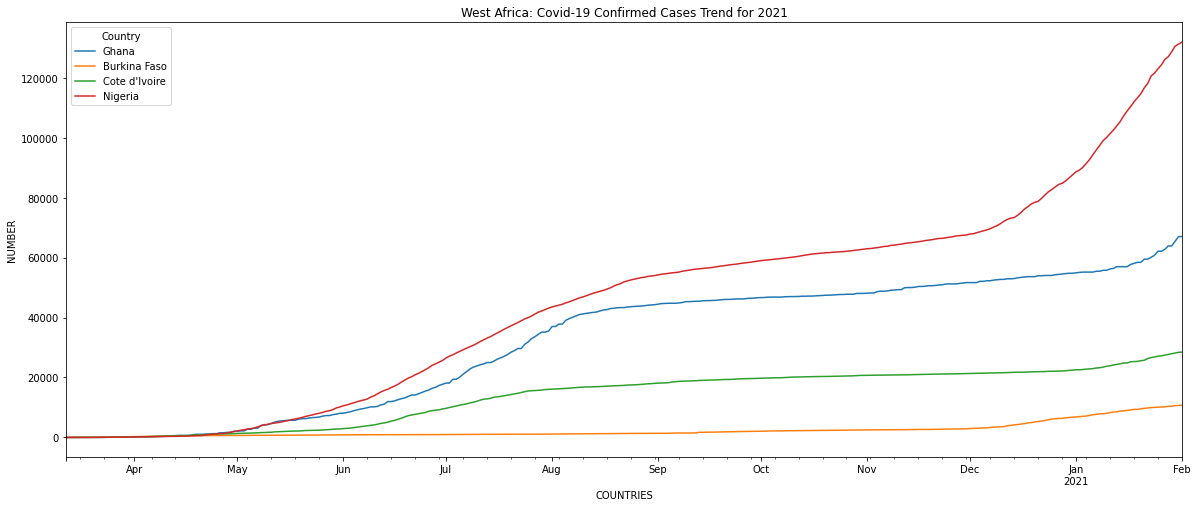

In [41]:
confirmed_line_chart( data_2021( confirmed )[countries] )

In [43]:
def recovered_line_chart(dataset):
    ax = dataset.plot.line(figsize=(20,8))
    ax.set_title( 'West Africa: Covid-19 Recovered Cases Trend for 2021' )
    ax.set_xlabel( 'COUNTRIES' )
    ax.set_ylabel( 'NUMBERs' )

    plt.show()

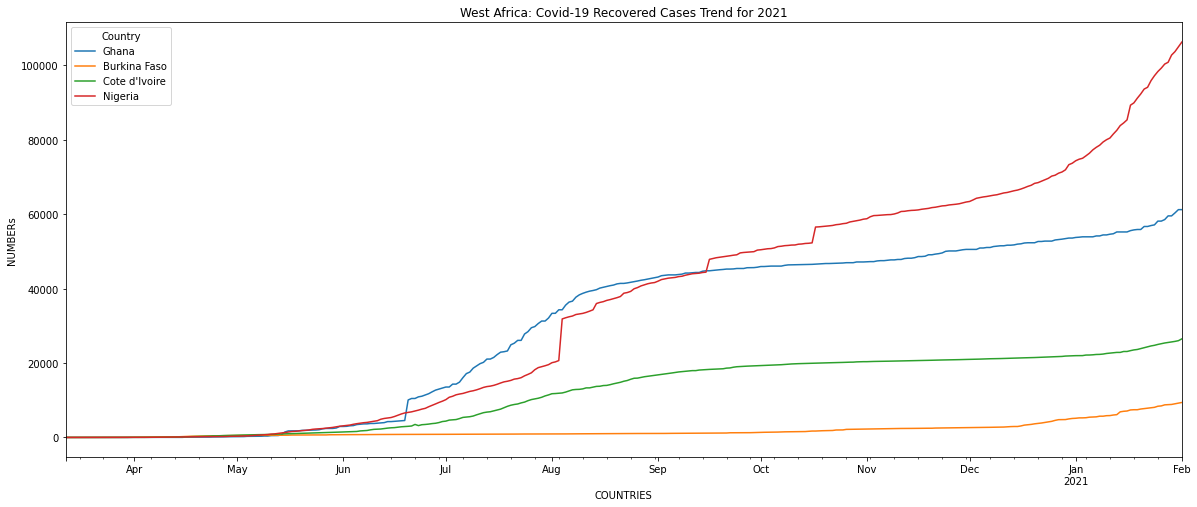

In [44]:
recovered_line_chart( data_2021( recovered )[countries] )

In [45]:
def deaths_line_chart(dataset):
    ax = dataset.plot.line(figsize=(20,8))

    ax.set_title( 'West Africa: Covid-19 Deaths Trend for 2021' )
    ax.set_xlabel( 'COUNTRIES' )
    ax.set_ylabel( 'NUMBER' )

    plt.show()

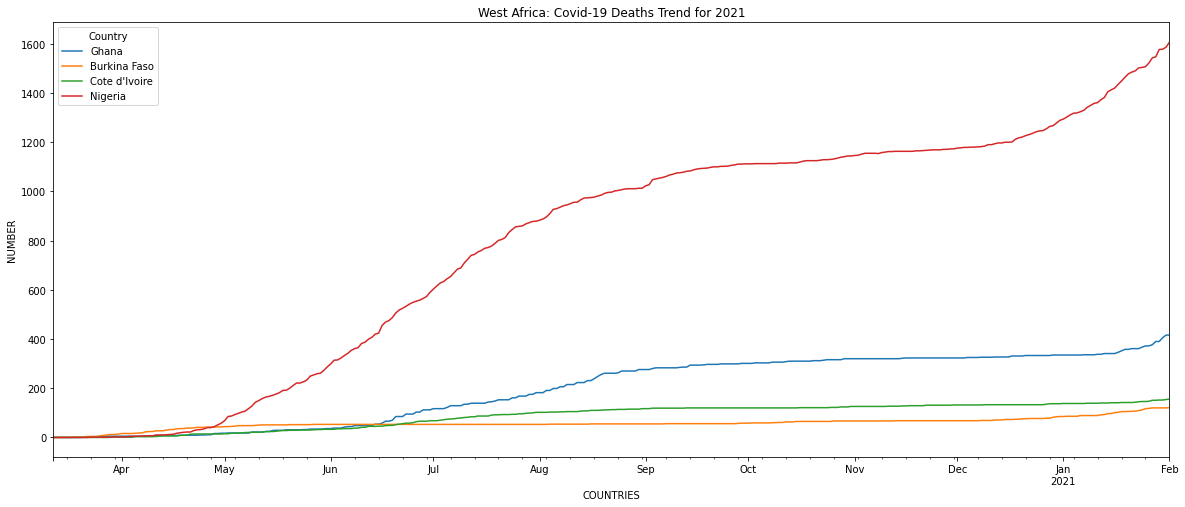

In [61]:
deaths_line_chart( data_2021( deaths )[countries] )

<h1>creating box charts</h1>

In [59]:
def confirmed_box_chart(dataset) -> 'box plot':
    ax = dataset.plot.box(figsize=(20,8))
    ax.set_title( 'West Africa: Covid-19 Confirmed Cases Trend for 2021' )
    ax.set_xlabel( 'COUNTRIES' )
    ax.set_ylabel( 'NUMBER' )

    plt.show

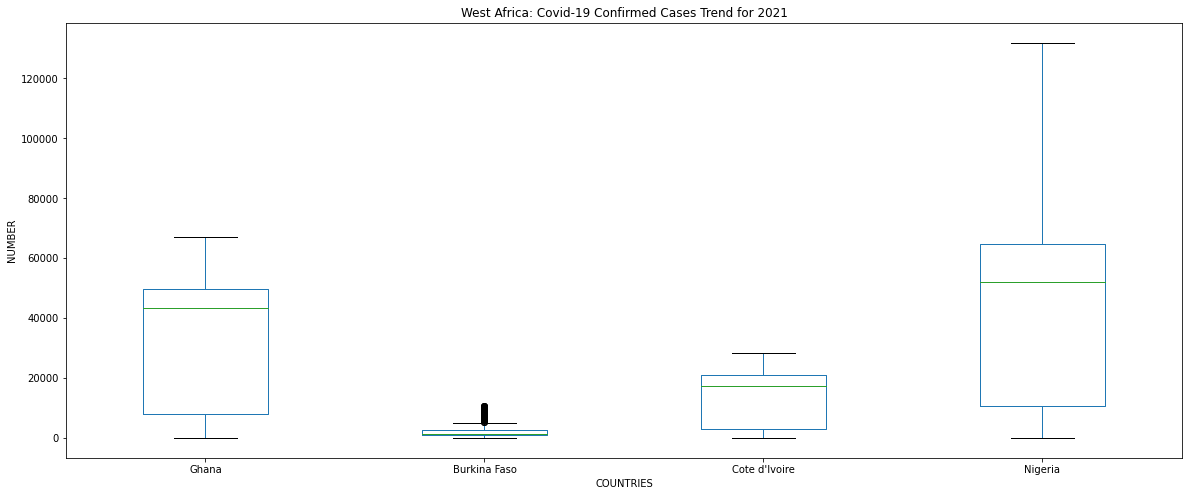

In [60]:
confirmed_box_chart( data_2021( confirmed )[countries] )

In [65]:
def recovered_box_chart(dataset) -> 'box plot':
    ax = dataset.plot.box(figsize=(20,8))
    ax.set_title( 'West Africa: Covid-19 Recovered Cases Trend for 2021' )
    ax.set_xlabel( 'COUNTRIES' )
    ax.set_ylabel( 'NUMBERs' )
    plt.show()
    #plt.savefig( 'Recovered_box_chart_2021.png' )

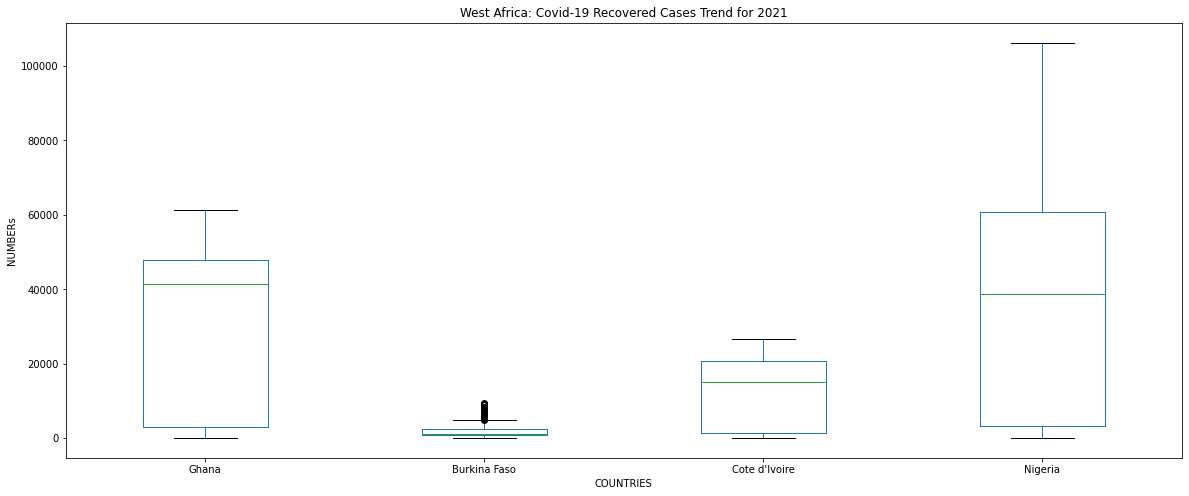

In [66]:
recovered_box_chart( data_2021( recovered )[countries] )

In [62]:
def deaths_box_chart(dataset) -> 'box plot':
    ax = dataset.plot.box(figsize=(20,8))

    ax.set_title( 'West Africa: Covid-19 Deaths Trend for 2021' )
    ax.set_xlabel( 'COUNTRIES' )
    ax.set_ylabel( 'NUMBER' )
    plt.show()
    #plt.savefig( 'Deaths_box_chart_2021.png' )

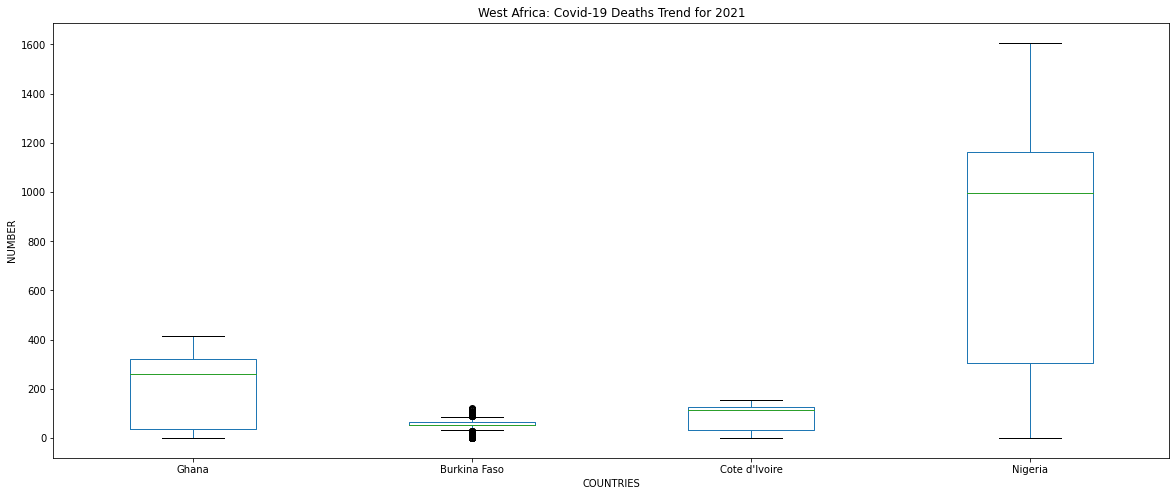

In [63]:
deaths_box_chart( data_2021( deaths )[countries] )